# Sentiment Analysis of twitter trends 

## Training a classifier

In [36]:
import nltk

In [37]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to C:\Users\Yasir
[nltk_data]     Mehmood\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [38]:
from nltk.corpus import movie_reviews

In [39]:
len(movie_reviews.fileids())

2000

In [40]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [41]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

In [42]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [43]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

In [44]:
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

In [45]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Yasir
[nltk_data]     Mehmood\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
all_words = movie_reviews.words()
len(all_words)/1e6

1.58382

In [47]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Yasir
[nltk_data]     Mehmood\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
import string

In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [265]:
list_others= ['https', '//']
list_others

['https', '//']

In [270]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)+list_others

In [52]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]
type(filtered_words)

list

In [53]:
len(filtered_words)/1e6

0.710579

In [54]:
from collections import Counter

word_counter = Counter(filtered_words)

In [55]:
most_common_words = word_counter.most_common()[:10]

In [56]:
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

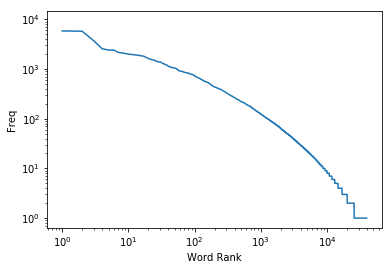

In [58]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

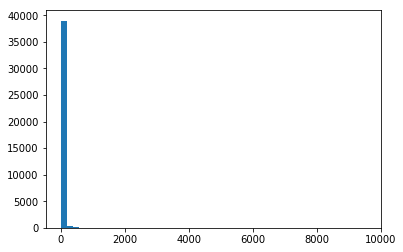

In [59]:
plt.hist(sorted_word_counts, bins=50);

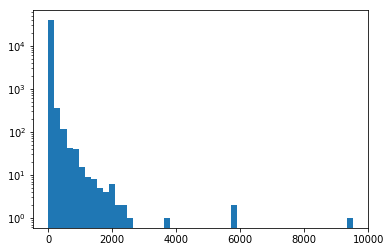

In [60]:
plt.hist(sorted_word_counts, bins=50, log=True);

In [267]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [144]:
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids
]

In [145]:
print(negative_features[3])

({'quest': 1, 'camelot': 1, 'warner': 1, 'bros': 1, 'first': 1, 'feature': 1, 'length': 1, 'fully': 1, 'animated': 1, 'attempt': 1, 'steal': 1, 'clout': 1, 'disney': 1, 'cartoon': 1, 'empire': 1, 'mouse': 1, 'reason': 1, 'worried': 1, 'recent': 1, 'challenger': 1, 'throne': 1, 'last': 1, 'fall': 1, 'promising': 1, 'flawed': 1, '20th': 1, 'century': 1, 'fox': 1, 'production': 1, 'anastasia': 1, 'hercules': 1, 'lively': 1, 'cast': 1, 'colorful': 1, 'palate': 1, 'beat': 1, 'hands': 1, 'came': 1, 'time': 1, 'crown': 1, '1997': 1, 'best': 1, 'piece': 1, 'animation': 1, 'year': 1, 'contest': 1, 'pretty': 1, 'much': 1, 'dead': 1, 'arrival': 1, 'even': 1, 'magic': 1, 'kingdom': 1, 'mediocre': 1, '--': 1, 'pocahontas': 1, 'keeping': 1, 'score': 1, 'nearly': 1, 'dull': 1, 'story': 1, 'revolves': 1, 'around': 1, 'adventures': 1, 'free': 1, 'spirited': 1, 'kayley': 1, 'voiced': 1, 'jessalyn': 1, 'gilsig': 1, 'early': 1, 'teen': 1, 'daughter': 1, 'belated': 1, 'knight': 1, 'king': 1, 'arthur': 1, '

In [148]:
positive_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in positive_fileids
]

In [136]:
print(positive_features[6])

({'apparently': 1, 'director': 1, 'tony': 1, 'kaye': 1, 'major': 1, 'battle': 1, 'new': 1, 'line': 1, 'regarding': 1, 'film': 1, 'american': 1, 'history': 1, 'x': 1, 'know': 1, 'details': 1, 'fight': 1, 'seems': 1, 'happy': 1, 'final': 1, 'product': 1, 'nearly': 1, 'removed': 1, 'name': 1, 'credits': 1, 'altogether': 1, 'heard': 1, 'kind': 1, 'thing': 1, 'happening': 1, 'makes': 1, 'wonder': 1, 'much': 1, 'input': 1, 'studio': 1, 'films': 1, 'produce': 1, 'found': 1, 'extremely': 1, 'good': 1, 'focused': 1, 'look': 1, 'touchy': 1, 'subject': 1, 'racism': 1, 'powerful': 1, 'charismatic': 1, 'performance': 1, 'edward': 1, 'norton': 1, 'hard': 1, 'believe': 1, 'two': 1, 'years': 1, 'since': 1, 'fantastic': 1, 'role': 1, 'primal': 1, 'fear': 1, 'starring': 1, 'making': 1, 'star': 1, 'one': 1, 'performers': 1, 'becomes': 1, 'character': 1, 'work': 1, 'best': 1, 'performances': 1, 'year': 1, 'plays': 1, 'young': 1, 'man': 1, 'named': 1, 'derek': 1, 'vinyard': 1, 'skinhead': 1, 'living': 1, '

In [66]:
from nltk.classify import NaiveBayesClassifier

In [67]:
split = 800

In [68]:
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [69]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[:split]+negative_features[:split])*100

98.0625

In [129]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])*100

71.75

In [130]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
                    anna = 1                 pos : neg    =     10.3 : 1.0
                  symbol = 1                 pos : neg    =     10.3 : 1.0


## Twitter API Access

In [9]:
import pickle
import os
import pandas as pd

In [10]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = 'NSBtj49mpE8Cq7u318ZhXwUW3'
    Twitter['Consumer Secret'] = 'cOhUlIORUZop7XpFChBfFkASbplLGRLvnOpzYYXMOw9qbTbD0g'
    Twitter['Access Token'] = '948651348974858242-3vvqlnYFr5dDaZiZiWznP5NV4mvoLSN'
    Twitter['Access Token Secret'] = 'VLkkJ090noblEqeX9Mn67RG5aYZxZncZCCmGqgZL68m5N'
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

In [11]:
Twitter['Consumer Key'] = 'NSBtj49mpE8Cq7u318ZhXwUW3'
Twitter['Consumer Secret'] = 'cOhUlIORUZop7XpFChBfFkASbplLGRLvnOpzYYXMOw9qbTbD0g'
Twitter['Access Token'] = '948651348974858242-3vvqlnYFr5dDaZiZiWznP5NV4mvoLSN'
Twitter['Access Token Secret'] = 'VLkkJ090noblEqeX9Mn67RG5aYZxZncZCCmGqgZL68m5N'

In [12]:
import twitter

auth = twitter.oauth.OAuth(Twitter['Access Token'],
                           Twitter['Access Token Secret'],
                           Twitter['Consumer Key'],
                           Twitter['Consumer Secret'])

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving world trends

In [13]:
World_WOE_ID = 1
world_trends = twitter_api.trends.place(_id=World_WOE_ID)

In [14]:
pd.DataFrame(world_trends[0]['trends'])

,name,promoted_content,query,tweet_volume,url
0,#Bachelor,None,%23Bachelor,15167.0,http://twitter.com/search?q=%23Bachelor
1,#BestBoyBand,None,%23BestBoyBand,1106270.0,http://twitter.com/search?q=%23BestBoyBand
2,#COAC2018P2,None,%23COAC2018P2,NaN,http://twitter.com/search?q=%23COAC2018P2
3,#راسب_ولكن,None,%23%D8%B1%D8%A7%D8%B3%D8%A8_%D9%88%D9%84%D9%83...,45503.0,http://twitter.com/search?q=%23%D8%B1%D8%A7%D8...
4,#OTDirecto10E,None,%23OTDirecto10E,89354.0,http://twitter.com/search?q=%23OTDirecto10E
5,يوسف سيف,None,%22%D9%8A%D9%88%D8%B3%D9%81+%D8%B3%D9%8A%D9%81%22,NaN,http://twitter.com/search?q=%22%D9%8A%D9%88%D8...
6,7-Eleven,None,7-Eleven,20410.0,http://twitter.com/search?q=7-Eleven
7,Omar Pérez,None,%22Omar+P%C3%A9rez%22,NaN,http://twitter.com/search?q=%22Omar+P%C3%A9rez%22
8,Erazo,None,Erazo,NaN,http://twitter.com/search?q=Erazo
9,Jack White,None,%22Jack+White%22,NaN,http://twitter.com/search?q=%22Jack+White%22


## Colleting tweets for top trend

In [461]:
q = 'justiceforzainb' 

number = 100

#search_results = twitter_api.search.tweets(q=q, count=number)
#statuses = search_results['statuses']

In [462]:
all_text = []
filtered_statuses = []

In [463]:
for i in range(0, 10):
    search_results = twitter_api.search.tweets(q=q, count=number)
    statuses = search_results['statuses']
    for s in statuses:
        if not s["text"] in all_text:
            filtered_statuses.append(s)
            all_text.append(s["text"])

In [464]:
len(filtered_statuses)

60

In [465]:
filtered_statuses[0]['text']

'RT @MarriMumtaz: #justiceForZainb https://t.co/8tHRk9YgG4'

## Extracting id's, text, hashtags and screen name from tweets

In [466]:
status_texts = [ status['text'] 
                 for status in filtered_statuses ]
#status_texts

In [467]:
ids = [ status['id'] 
                 for status in filtered_statuses ]

In [468]:
type(status_texts[1])

str

In [469]:
hashtags = [ hashtag['text'] 
             for status in filtered_statuses
                 for hashtag in status['entities']['hashtags'] ]

In [470]:
screen_names = [ user_mention['screen_name'] 
                 for status in filtered_statuses
                     for user_mention in status['entities']['user_mentions'] ]

In [471]:
# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

In [472]:
type(words)

list

In [473]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('#JusticeForZainb', 21), ('کے', 16), ('RT', 14), ('کو', 12), ('کی', 11), ('#JusticeForZainab', 11), ('تو', 11), ('کا', 11), ('پر', 10), ('بھی', 8)]

[('JusticeForZainb', 3), ('OfficialDGISPR', 2), ('HumairaYousafi', 2), ('shamas_virk99', 2), ('MarriMumtaz', 1), ('BWSOP', 1), ('AseefaBZ', 1), ('AnwarLodhi', 1), ('SardarSain3', 1), ('CMShehbaz', 1)]

[('JusticeForZainb', 22), ('JusticeForZainab', 11), ('justiceforzainb', 4), ('RaiseYourVoice', 3), ('justiceForZainb', 2), ('Justice4Zainab', 2), ('جاگ_پنجاب', 1), ('قصور', 1), ('عجیب', 1), ('غریبوں', 1)]



In [474]:
def prettyprint_counts(label, list_of_tuples):
    print("\n{:^20} | {:^6}".format(label, "Count"))
    print("*"*40)
    for k,v in list_of_tuples:
        print("{:20} | {:>6}".format(k,v))

In [475]:
for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    
    c = Counter(data)
    prettyprint_counts(label, c.most_common()[:10])


        Word         | Count 
****************************************
#JusticeForZainb     |     21
کے                   |     16
RT                   |     14
کو                   |     12
کی                   |     11
#JusticeForZainab    |     11
تو                   |     11
کا                   |     11
پر                   |     10
بھی                  |      8

    Screen Name      | Count 
****************************************
JusticeForZainb      |      3
OfficialDGISPR       |      2
HumairaYousafi       |      2
shamas_virk99        |      2
MarriMumtaz          |      1
BWSOP                |      1
AseefaBZ             |      1
AnwarLodhi           |      1
SardarSain3          |      1
CMShehbaz            |      1

      Hashtag        | Count 
****************************************
JusticeForZainb      |     22
JusticeForZainab     |     11
justiceforzainb      |      4
RaiseYourVoice       |      3
justiceForZainb      |      2
Justice4Zainab       |      2
جاگ_

## Testing the tweets sentiment

In [527]:
sentence=status_texts
#sentence='not so bad but amazing'
#sentence
#sentence

'not so bad but amazing'

In [528]:
#words=sentence.lower()
#words

'not so bad but amazing'

In [529]:
#words = nltk.word_tokenize(words)
#words

['not', 'so', 'bad', 'but', 'amazing']

In [495]:
len(sentence)-1

16

In [496]:
words=[]
for i in range(0,len(sentence)):
    words.extend(nltk.word_tokenize(sentence[i].lower()))
#words

['t', 'h', 'i', 's', 'i', 's', 'i', 'n', 's', 'u', 'l', 't', 'i', 'n', 'g']

In [530]:
features = build_bag_of_words_features_filtered(words)

In [531]:
sentiment_classifier.classify(features)

'neg'